In [12]:

from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision
import numpy as np 
from datasetloader import Cifar10Loader
from forward_process import forward_process_for_single_image 
class Cifar10Visualizer():

    def __init__(self, cifar10_loader):
        self.loader = cifar10_loader

    def show_images(self, num_images=16):
        data_iter = iter(self.loader.dataloader)
        images, _ = next(data_iter)

        fig, axes = plt.subplots(nrows=num_images // 4, ncols=4, figsize=(10, 10))

        for i in range(num_images):
            img = torchvision.transforms.ToPILImage()(images[i] / 2 + 0.5)  
            axes[i // 4, i % 4].imshow(img)
            axes[i // 4, i % 4].axis('off')

        plt.show()
 
class Cifar10ForwardProcess():
    def __init__(self, cifar10_loader ): 
        self.loader = cifar10_loader

    def show_images_with_noise(self,total_step,max_step,start_index, batch_size=16):
        subplot_width=4
        subplot_height=4 
        fig_width = total_step * subplot_width
        fig_height = batch_size * subplot_height
        fig, axes = plt.subplots(batch_size, total_step, figsize=(fig_width,fig_height))

        data_iter = iter(self.loader.dataloader)
        images, _ = next(data_iter)
        times = np.linspace(start_index,max_step-1,total_step,dtype=np.int32)
        print(times)
        for ix,img in enumerate(images):   
            for iy, time in enumerate(times):
                noisy_image = forward_process_for_single_image(img,t=time) 
                noisy_image_np = transforms.ToPILImage()(noisy_image/ 2 + 0.5)
                axes[ix, iy].imshow(noisy_image_np)
                axes[ix, iy].axis('off')   

        plt.show()


def show_images(images, row=5,col=20):
        subplot_width=4
        subplot_height=4 
        fig_width = col * subplot_width
        fig_height = row * subplot_height
        fig, axes = plt.subplots(row, col, figsize=(fig_width,fig_height))
        for r in range(row):
            for c in range(col):   

                noisy_image_np = transforms.ToPILImage()(images[ r * row  + c ]/ 2 + 0.5)
                axes[r, c].imshow(noisy_image_np)
                axes[r, c].axis('off')   

        plt.show()




Files already downloaded and verified


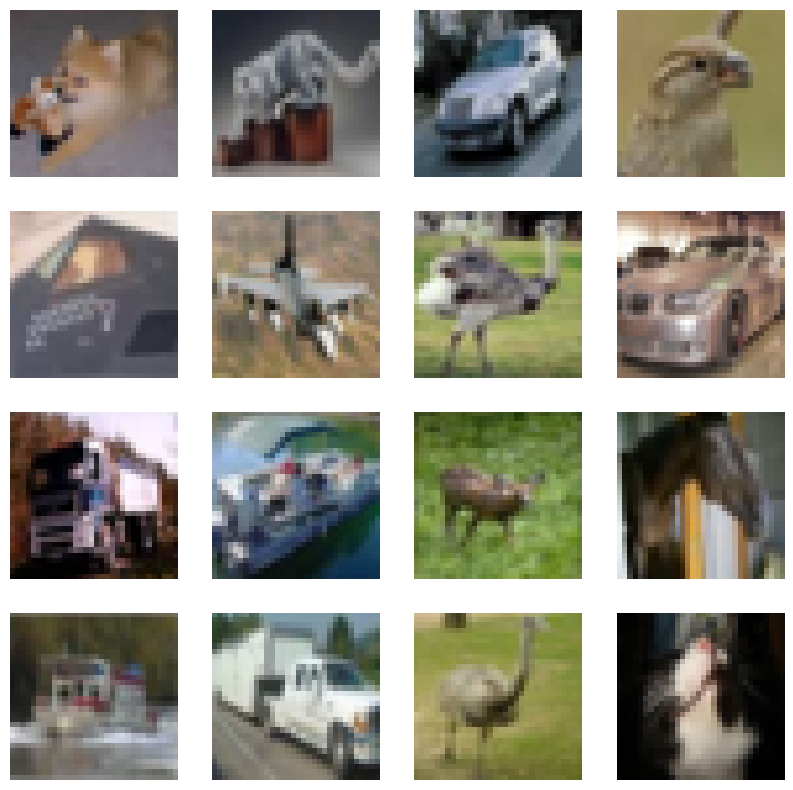

In [30]:

batch_size = 16
cifar_loader = Cifar10Loader(batch_size)
visualizer = Cifar10Visualizer(cifar_loader)
visualizer.show_images(num_images=16)


Files already downloaded and verified
[  0  28  57  85 114 142 171 199 228 256 285 313 342 370 399]


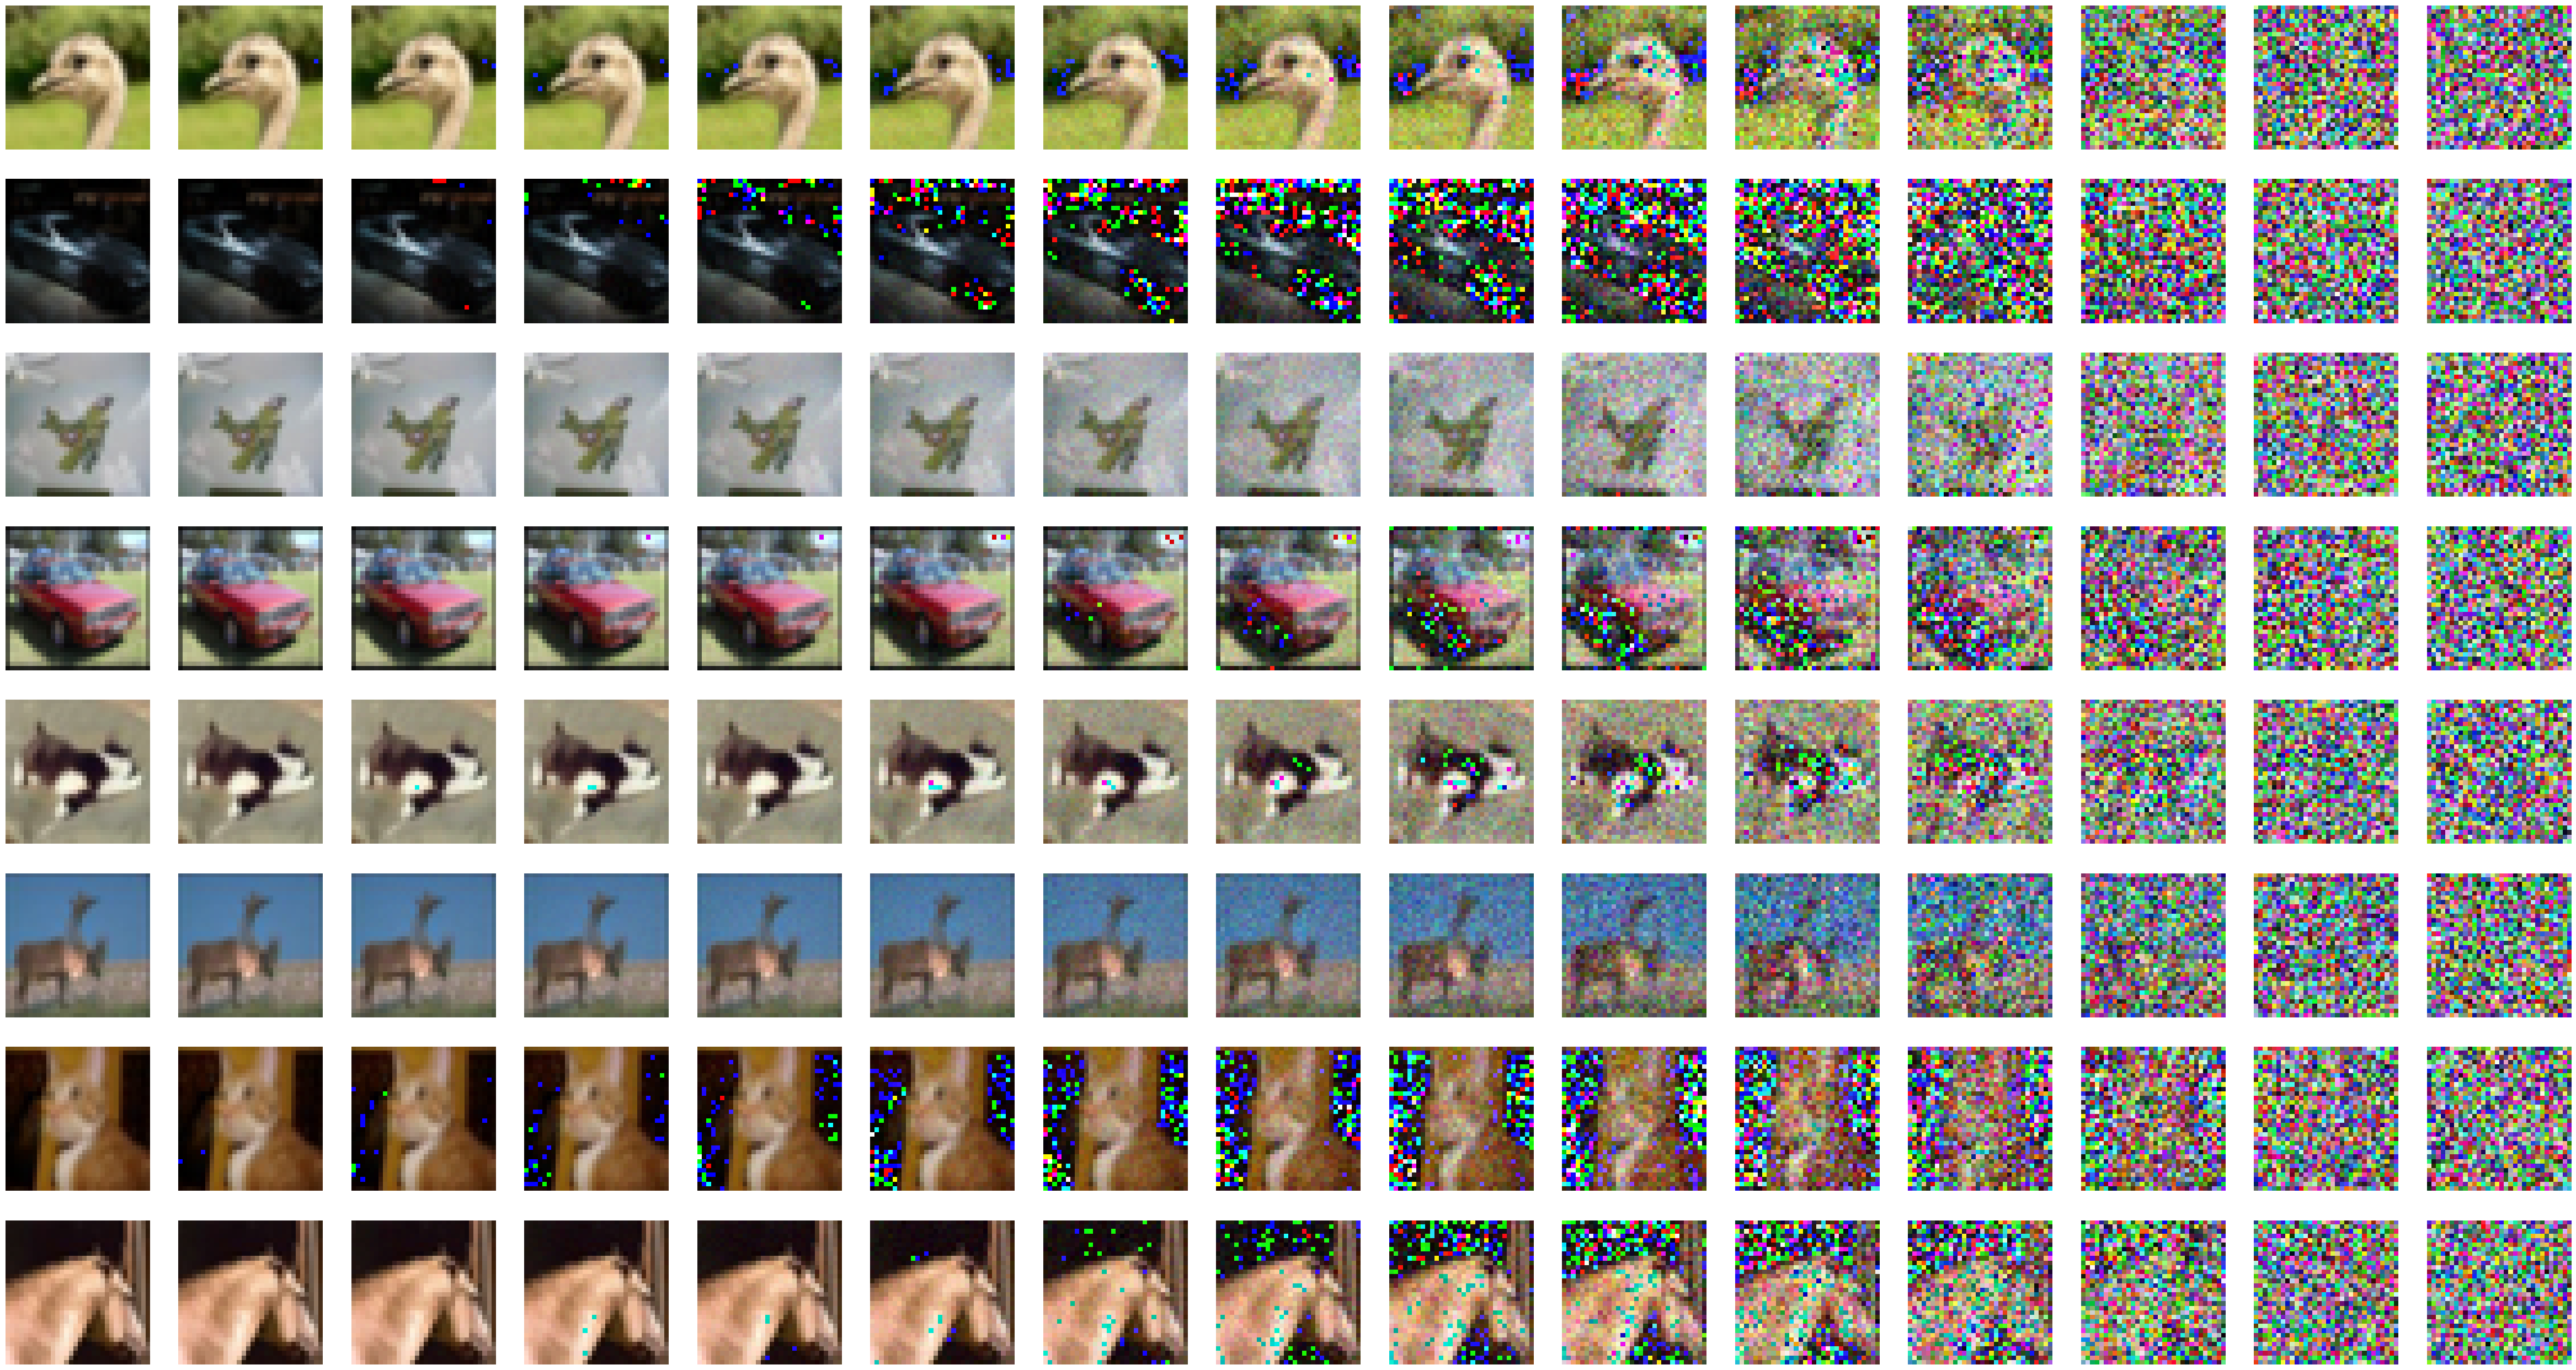

In [4]:

batch_size = 8
total_step=15
max_step=400
start_index=0
cifar_loader = Cifar10Loader(batch_size)
visualizer = Cifar10ForwardProcess(cifar_loader)
visualizer.show_images_with_noise(total_step,max_step,start_index, batch_size=batch_size)

Files already downloaded and verified


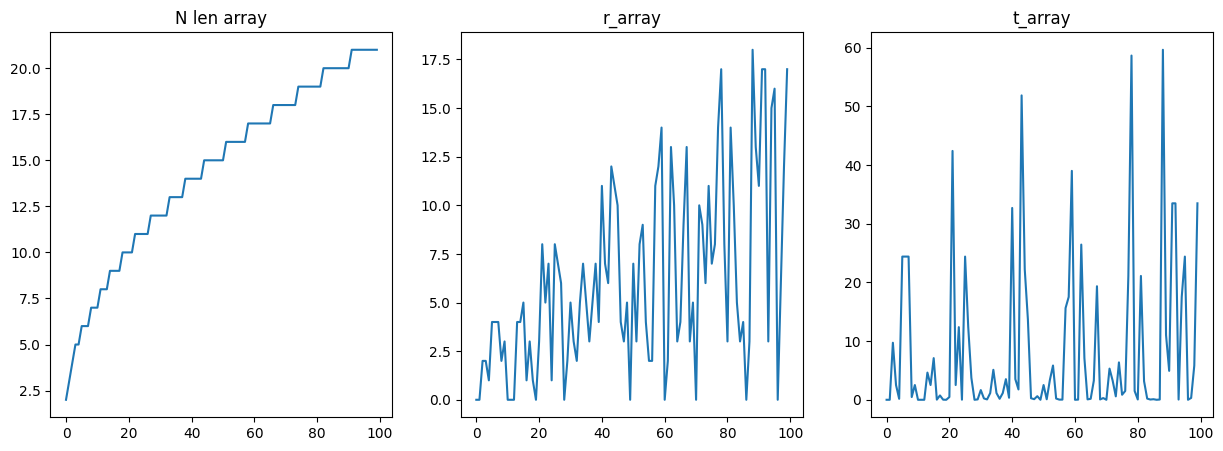

100


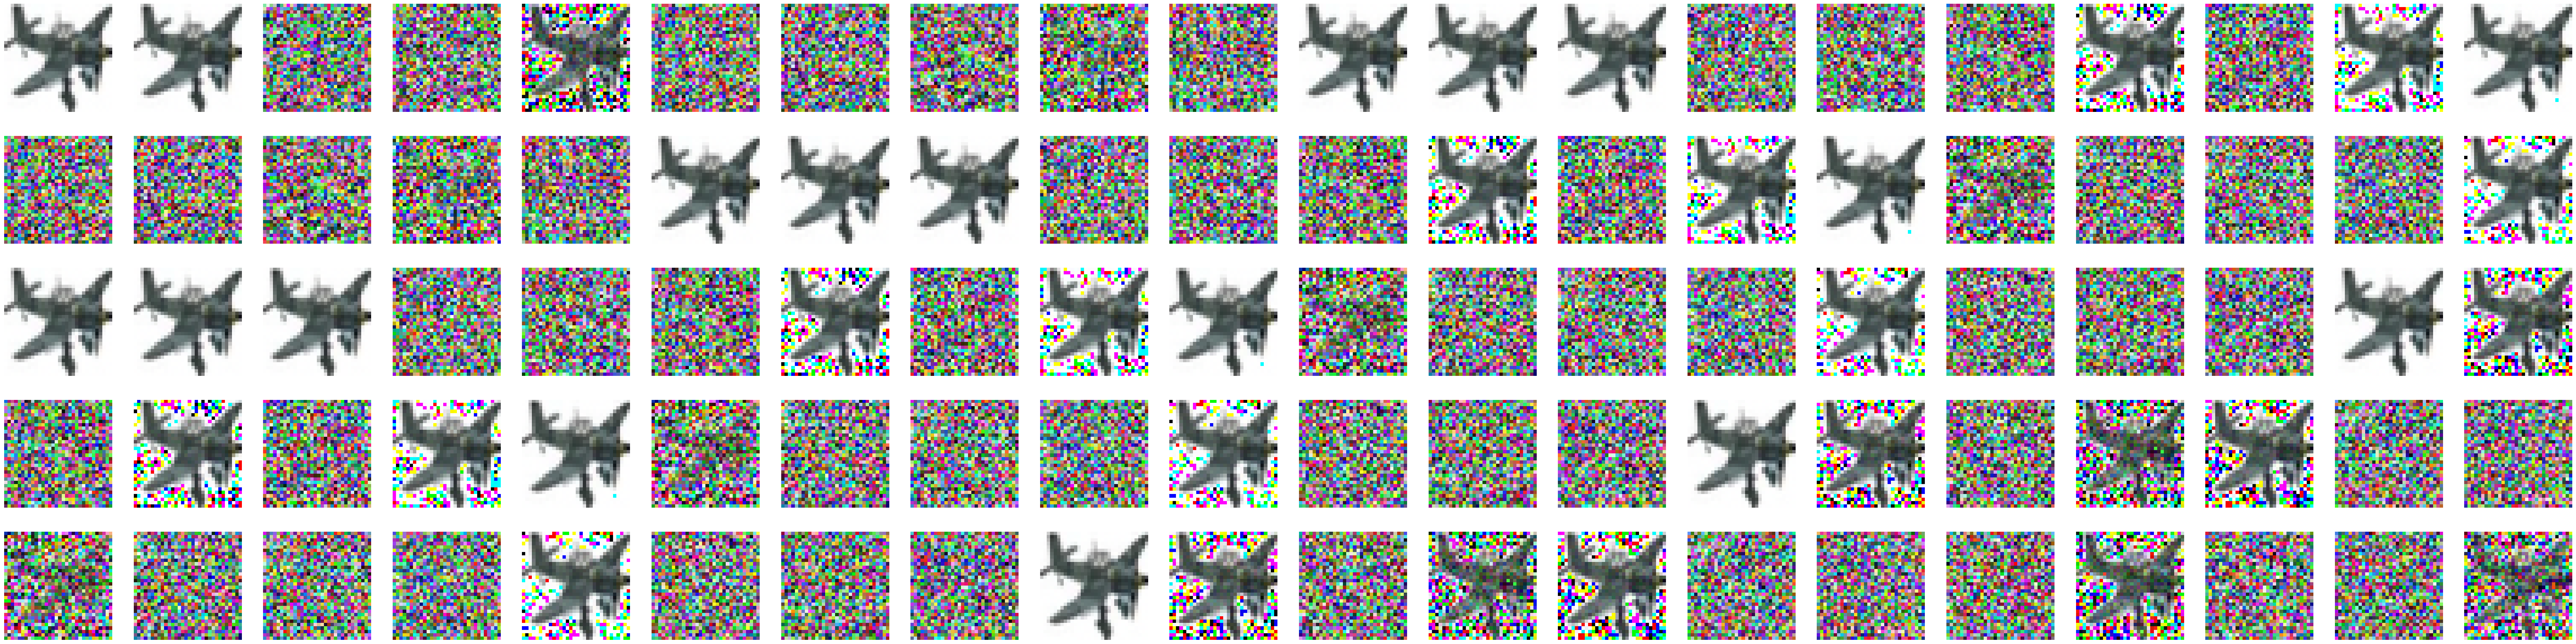

In [22]:
import math
import numpy as np
from model.utils import kerras_boundaries
import matplotlib.pyplot as plt     # for plotting
import torch
epochs=100
s1=20
s0=2
len_array=[]
r_array=[]
t_array=[]

cifar_loader = Cifar10Loader(batch_size)
data_iter = iter(cifar_loader.dataloader) 
images, _ = next(data_iter)
org_img= images[0]
noisy_img_list= [ ]
for epoch in range(epochs):
    N1 = math.ceil(math.sqrt( (epoch/epochs)* ((s1 +1 )**2   - s0**2)   + s0**2) - 1) + 1 
    len_array.append(N1) 
    
    boundaries1 = kerras_boundaries(7.0, 0.002, N1, 80.0) 
    #print(np.amax(boundaries1))
    r= np.random.randint(0,N1-1) 
    r_array.append(r)
    t1= boundaries1[r].view(1, 1, 1) 
    t_array.append(t1.item())
    z = torch.randn_like(img) 
    img = org_img + z * t1 
    #t = torch.randint(0, N - 1, (1, 1))
    tb1 = boundaries1[r]  
    noisy_img_list.append(img)

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

axes[0].plot(len_array ) 

axes[0].set_title('N len array')
# İkinci plot
axes[1].plot(r_array ) 
axes[1].set_title('r_array')

# Üçüncü plot
axes[2].plot(t_array ) 
axes[2].set_title('t_array') 
plt.show()
print(len(noisy_img_list))
show_images(images=noisy_img_list)

